In [20]:
import json
import time
import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.dates as mdates


In [61]:
def get_market_data(end_point, symbol, to_symbol, to_timestamp, limit):
    base_url = "https://min-api.cryptocompare.com/data/v2/"
    api_key = "742bde8b3c9481bac5f758fbe3b9b6dac657a48ed336a8b18ab5f2fcbd1df5e6"
    
    url = (
        base_url + end_point + "?fsym=" + symbol + 
        "&tsym=" + to_symbol + "&toTs=" + to_timestamp +
        "&limit=" + limit + "&api_key=" + api_key
          )
    
    r = requests.get(url = url)
    if r.status_code == 200:
        json_obj = json.loads(r.text)
        prices_dic_ls = json_obj['Data']['Data']
    
    return prices_dic_ls

In [62]:
def get_dict(json_arr, x_key, y_key, x_is_datetime= True):
    dic = dict()

    for json_obj in json_arr:
        if x_is_datetime:
            dt = datetime.datetime.fromtimestamp(json_obj[x_key])
        else:
            dt = market_dict[x_key]
            
        dic[dt] = json_obj[y_key]
        
    return dic

In [65]:
def plot(dictionaries_dict, title, x_label, y_label, image_name=None, 
         save_image=False, max_y_ticks=0, set_y_zero = True):
    
    fig, ax = plt.subplots(figsize=(12,6))
    
    for k in dictionaries_dict.keys():
        dict_name = k
        d = dictionaries_dict[k]
        ax.plot(d.keys(), d.values(), label=dict_name)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    format_xdata = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(format_xdata)

    if set_y_zero:
        ax.set_ylim(bottom=0)

    if max_y_ticks > 0:
        max_yticks = 10
        xloc = plt.MaxNLocator(max_yticks)
        ax.xaxis.set_major_locator(xloc)

    plt.legend()
    if save_image:
        if image_name is None:
            image_name = title
        fig.savefig('plots' + image_name + '.png', dpi=fig.dpi)
    plt.show()

### CLOAK on 2018-07-01 at 15:00 EST

In [127]:
##Call API
market_dict_list = get_market_data("histohour", "CLOAK", "BTC", str(1530478800), str(10))

In [130]:
##Format results
vol_to_dict = get_dict(market_dict_list, 'time', 'volumeto')
vol_from_dict = get_dict(market_dict_list, 'time', 'volumefrom')

d = {
 #   'Volume To': vol_to_dict
#     'Volume To': vol_to_dict,
     'Volume From': vol_from_dict
}

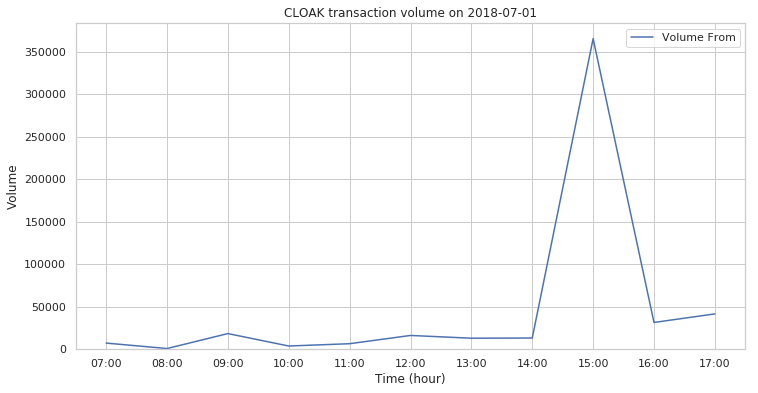

In [131]:
##Plot
title= "CLOAK transaction volume on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Volume')

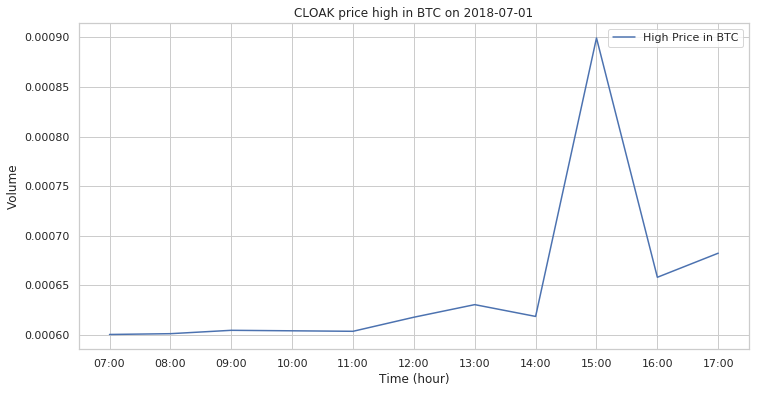

In [99]:
##Format results
high_dict = get_dict(market_dict_list, 'time', 'high')

d = {
     'High Price in BTC': high_dict
}
##Plot
title= "CLOAK price high in BTC on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Hourly High', set_y_zero=False)

### Stealth(XST) 2018-03-16 14:00 EST 130% (GMT -5)

In [88]:
##Call API
market_dict_list = get_market_data("histohour", "XST", "BTC", str(1521237600), str(10))

In [89]:
##Format results
vol_to_dict = get_dict(market_dict_list, 'time', 'volumeto')
vol_from_dict = get_dict(market_dict_list, 'time', 'volumefrom')

d = {
#    'Volume To': vol_to_dict
#     'Volume To': vol_to_dict,
     'Volume From': vol_from_dict
}

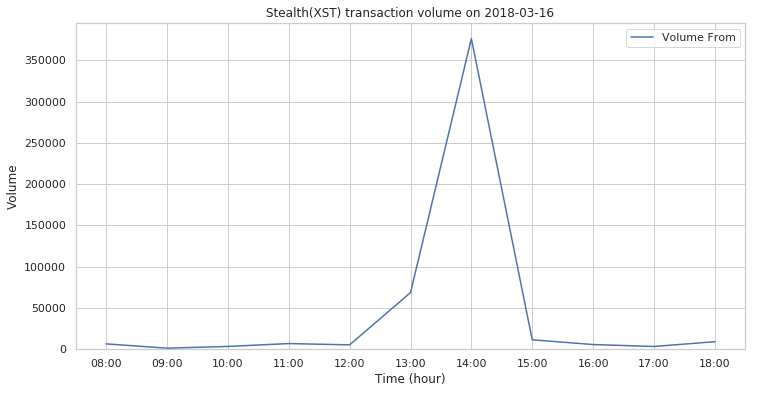

In [90]:
##Plot
title= "Stealth(XST) transaction volume on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Volume')

In [93]:
##Format results
high_dict = get_dict(market_dict_list, 'time', 'high')

d = {
     'High Price in BTC': high_dict
}

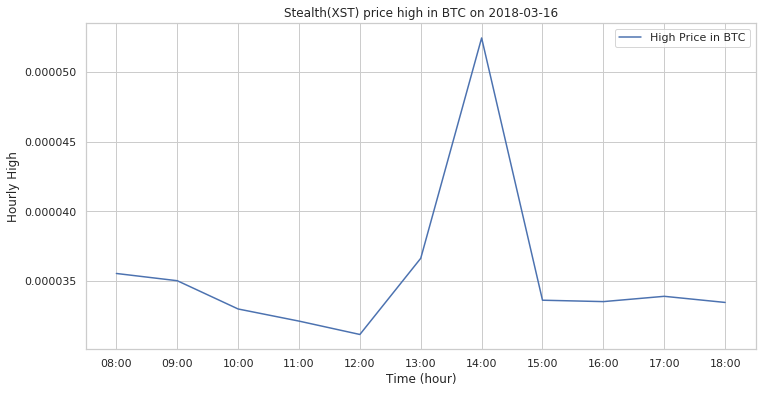

In [94]:
##Plot
title= "Stealth(XST) price high in BTC on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Hourly High', set_y_zero=False)

### Pesetacoin(PTC) 2018-02-21 14:00 EST 130% (GMT -5)

In [105]:
##Call API
market_dict_list = get_market_data("histohour", "PTC", "BTC", str(1519254000), str(10))

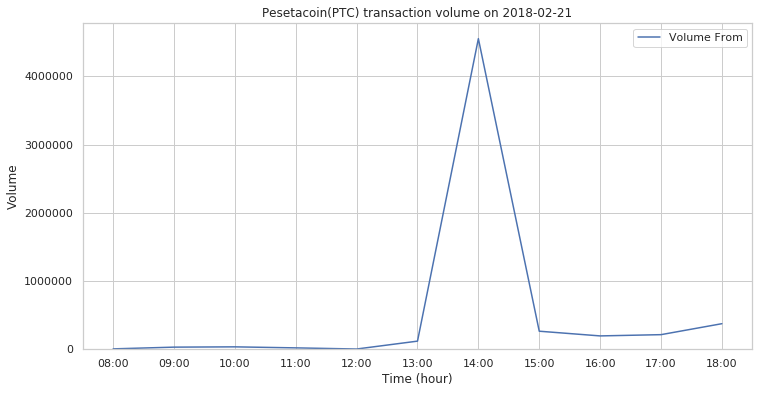

In [106]:
##Format results
vol_to_dict = get_dict(market_dict_list, 'time', 'volumeto')
vol_from_dict = get_dict(market_dict_list, 'time', 'volumefrom')

d = {
#    'Volume To': vol_to_dict
#     'Volume To': vol_to_dict,
     'Volume From': vol_from_dict
}

##Plot
title= "Pesetacoin(PTC) transaction volume on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Volume')

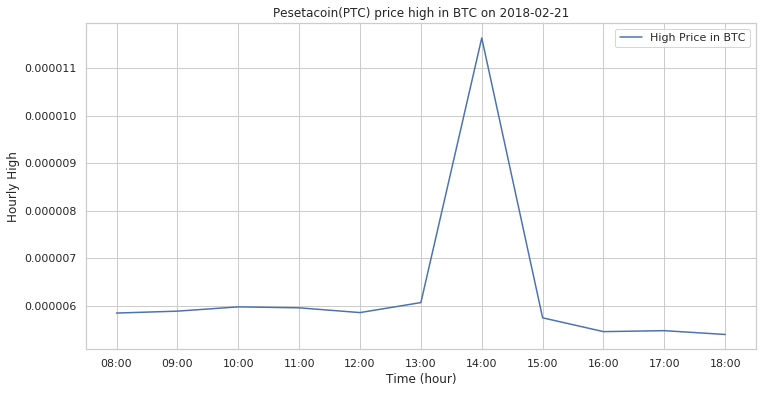

In [107]:
##Format results
high_dict = get_dict(market_dict_list, 'time', 'high')

d = {
     'High Price in BTC': high_dict
}
##Plot
title= "Pesetacoin(PTC) price high in BTC on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Hourly High', set_y_zero=False)

### Agrello(DLT) 2018-03-11 16:00 EST 130% (GMT -4)

In [132]:
##Call API
market_dict_list = get_market_data("histohour", "DLT", "BTC", str(1520812800), str(10))

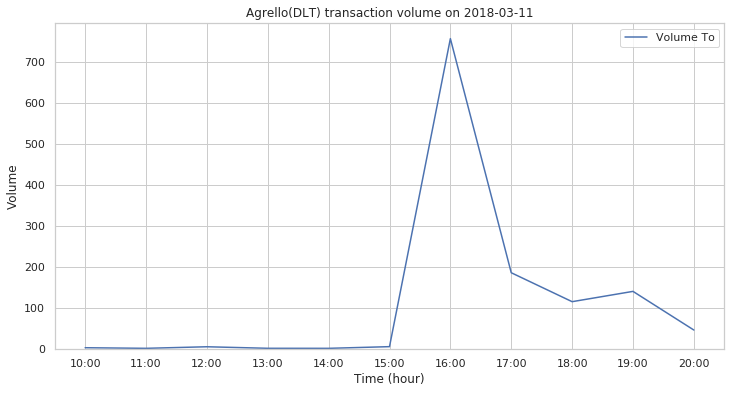

In [134]:
##Format results
vol_to_dict = get_dict(market_dict_list, 'time', 'volumeto')
vol_from_dict = get_dict(market_dict_list, 'time', 'volumefrom')

d = {
    'Volume To': vol_to_dict
#     'Volume To': vol_to_dict,
#     'Volume From': vol_from_dict
}

##Plot
title= "Agrello(DLT) transaction volume on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Volume')

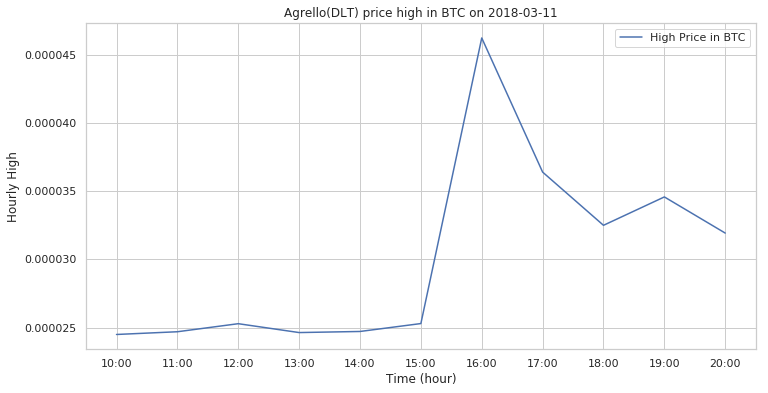

In [110]:
##Format results
high_dict = get_dict(market_dict_list, 'time', 'high')

d = {
     'High Price in BTC': high_dict
}
##Plot
title= "Agrello(DLT) price high in BTC on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Hourly High', set_y_zero=False)

### Nexus (NXS) 2018-07-04 3pm (GMT -4)

In [113]:
##Call API
market_dict_list = get_market_data("histohour", "NXS", "BTC", str(1530745200), str(10))

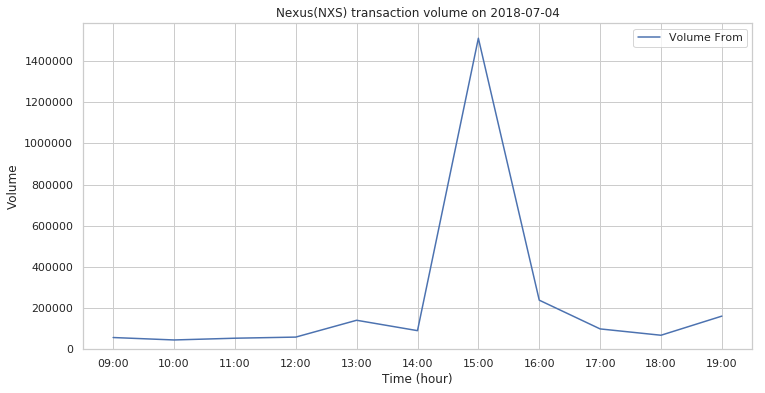

In [117]:
##Format results
vol_to_dict = get_dict(market_dict_list, 'time', 'volumeto')
vol_from_dict = get_dict(market_dict_list, 'time', 'volumefrom')

d = {
#    'Volume To': vol_to_dict
#     'Volume To': vol_to_dict,
     'Volume From': vol_from_dict
}

##Plot
title= "Nexus(NXS) transaction volume on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Volume')

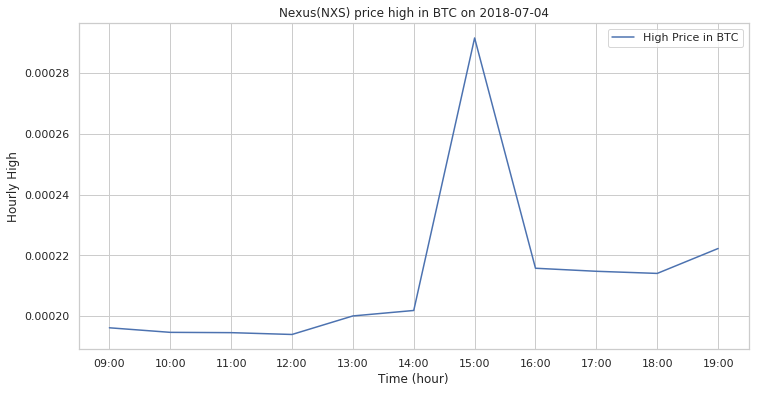

In [115]:
##Format results
high_dict = get_dict(market_dict_list, 'time', 'high')

d = {
     'High Price in BTC': high_dict
}
##Plot
title= "Nexus(NXS) price high in BTC on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Hourly High', set_y_zero=False)

### RLC 2018-01-21 18:00

In [135]:
##Call API
market_dict_list = get_market_data("histohour", "RLC", "BTC", str(1516586400), str(10))

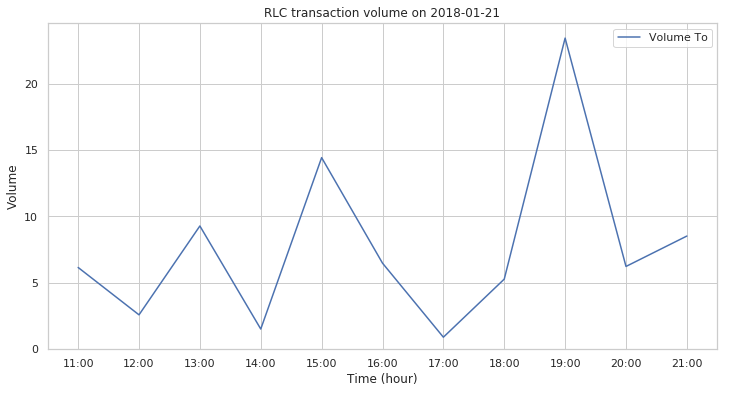

In [137]:
##Format results
vol_to_dict = get_dict(market_dict_list, 'time', 'volumeto')
vol_from_dict = get_dict(market_dict_list, 'time', 'volumefrom')

d = {
    'Volume To': vol_to_dict
#     'Volume To': vol_to_dict,
#     'Volume From': vol_from_dict
}

##Plot
title= "RLC transaction volume on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Volume')

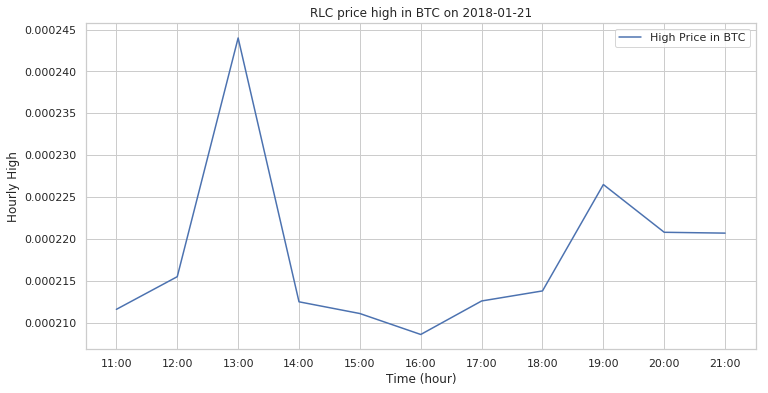

In [138]:
##Format results
high_dict = get_dict(market_dict_list, 'time', 'high')

d = {
     'High Price in BTC': high_dict
}
##Plot
title= "RLC price high in BTC on " + str(list(vol_to_dict.keys())[0].date())
plot(d, title, x_label='Time (hour)', y_label='Hourly High', set_y_zero=False)